In [4]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip install mediapy lovely-tensors tqdm einops opencv-python matplotlib --quiet torchmetrics hydra-core timm huggingface_hub transformers -q scikit-learn
# !pip install git+https://github.com/facebookresearch/segment-anything.git
# ============================================================
# CELL 0 — Install (RUN ONCE)
# ============================================================
!pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip -q install mediapy lovely-tensors tqdm einops opencv-python matplotlib torchmetrics hydra-core timm huggingface_hub transformers scikit-learn
!pip -q install git+https://github.com/facebookresearch/segment-anything.git



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [1]:
# from huggingface_hub import login

# login()  # paste your HF token here when it asks
# ============================================================
# CELL 1 — HuggingFace Login + Drive
# ============================================================
from huggingface_hub import login
login()  # paste your HF token

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import files
# uploaded = files.upload()  # choose your dinov3-main.zip


In [ ]:
# !unzip dinov3-main.zip -d /content
# !ls /content

In [ ]:
# import torch
# import sys
# print(sys.executable)

# print(torch.__version__)
# print(torch.version.cuda)
# print(torch.cuda.is_available())



/usr/bin/python3
2.9.0+cu126
12.6
True


In [ ]:
# import datetime
# import functools
# import io
# import logging
# import math
# import os
# from pathlib import Path
# import tarfile
# import time
# import urllib

# import lovely_tensors
# import matplotlib.pyplot as plt
# import mediapy as mp
# import numpy as np
# from PIL import Image
# import torch
# import torch.nn.functional as F
# import torchvision.transforms as TVT
# import torchvision.transforms.functional as TVTF
# from torch import Tensor, nn
# from tqdm import tqdm

# DISPLAY_HEIGHT = 200
# lovely_tensors.monkey_patch()
# torch.set_grad_enabled(False)
# logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# DINOV3_GITHUB_LOCATION = "facebookresearch/dinov3"

# if os.getenv("DINOV3_LOCATION") is not None:
#     DINOV3_LOCATION = os.getenv("DINOV3_LOCATION")
# else:
#     DINOV3_LOCATION = DINOV3_GITHUB_LOCATION

# print(f"DINOv3 location set to {DINOV3_LOCATION}")

DINOv3 location set to facebookresearch/dinov3


In [ ]:
# # =========================
# # SAM ViT-B (CPU) + filtered re-detect function
# # =========================
# !pip install -q git+https://github.com/facebookresearch/segment-anything.git
# !pip install -q opencv-python

# import os, urllib.request
# import numpy as np
# import cv2
# import torch
# from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# DEVICE = "cpu"

# # 1) Download the CORRECT checkpoint for vit_b
# sam_checkpoint = "/content/sam_vit_b_01ec64.pth"
# url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"

# if not os.path.exists(sam_checkpoint):
#     print("Downloading SAM ViT-B checkpoint...")
#     urllib.request.urlretrieve(url, sam_checkpoint)
#     print("Downloaded to:", sam_checkpoint)
# else:
#     print("Checkpoint already exists:", sam_checkpoint)

# # 2) Load SAM ViT-B
# sam = sam_model_registry["vit_b"](checkpoint=sam_checkpoint)
# sam.to(DEVICE).eval()
# print("SAM ViT-B loaded ✅ on", DEVICE)

# # 3) Create the generator
# sam_mask_generator = SamAutomaticMaskGenerator(
#     model=sam,
#     points_per_side=32,
#     pred_iou_thresh=0.6,
#     stability_score_thresh=0.6,
#     min_mask_region_area=50,
# )

# # 4) Filtering by size (tune later)
# SAM_MIN_AREA = 200
# SAM_MAX_AREA = 20000

# def sam_redetect_binary_mask_filtered(frame_pil, out_h, out_w, min_area=SAM_MIN_AREA, max_area=SAM_MAX_AREA):
#     img_np = np.array(frame_pil.convert("RGB"))
#     anns = sam_mask_generator.generate(img_np)

#     H, W = img_np.shape[:2]
#     merged = np.zeros((H, W), dtype=np.uint8)

#     kept = 0
#     for a in anns:
#         seg = a["segmentation"].astype(np.uint8)
#         area = int(seg.sum())
#         if min_area <= area <= max_area:
#             merged = np.maximum(merged, seg)
#             kept += 1

#     merged = cv2.resize(merged, (out_w, out_h), interpolation=cv2.INTER_NEAREST)
#     print(f"SAM total masks: {len(anns)} | kept: {kept} | merged pixels: {int(merged.sum())}")
#     return merged


  Preparing metadata (setup.py) ... done
Checkpoint already exists: /content/sam_vit_b_01ec64.pth
SAM ViT-B loaded ✅ on cpu


In [ ]:
# # === Load DINOv3 ViT-L16 from Hugging Face using Transformers ===
# from transformers import AutoImageProcessor, AutoModel
# import torch

# # This downloads the processor + model using your HF token
# processor = AutoImageProcessor.from_pretrained("facebook/dinov3-vitl16-pretrain-lvd1689m")
# model = AutoModel.from_pretrained("facebook/dinov3-vitl16-pretrain-lvd1689m")

# model.to("cpu")
# model.eval()

# print("Model loaded on:", next(model.parameters()).device)

# # === IMPORTANT: keep these values so the rest of the notebook works ===
# # DINOv3 ViT-L has patch size 16, embedding dimension given by model.config.hidden_size
# patch_size = 16
# embed_dim = model.config.hidden_size

# print(f"Patch size: {patch_size}")
# print(f"Embedding dimension: {embed_dim}")
# print(f"Peak GPU memory: {torch.cuda.max_memory_allocated() / 2**30:.1f} GB")


In [ ]:
# # === New forward() for HuggingFace DINOv3 ===

# # @torch.compile
# def forward(model, img):


#     if img.ndim == 3:          # [3, H, W]
#         img = img.unsqueeze(0)  # [1, 3, H, W]

#     with torch.no_grad():
#         outputs = model(pixel_values=img)

#     last_hidden = outputs.last_hidden_state  # [1, N_tokens, D]

#     num_reg = getattr(model.config, "num_register_tokens", 0)
#     patch_tokens = last_hidden[:, 1 + num_reg :, :]

#     N = patch_tokens.shape[1]
#     H_p = W_p = int(N ** 0.5)

#     patch_grid = patch_tokens.reshape(1, H_p, W_p, -1)  # [1, H_p, W_p, D]
#     return patch_grid.squeeze(0)


In [ ]:
# frame extraction
# import cv2
# import os

# VIDEO_NAME = "DJI_0991"
# MEDIA_DIR = "../../media"
# FRAMES_DIR = "../../media/frames/" + VIDEO_NAME
# VIDEO_PATH = "../../media/videos/" + VIDEO_NAME + ".MP4"

# os.makedirs(MEDIA_DIR + "/videos", exist_ok=True)
# os.makedirs(MEDIA_DIR + "/frames", exist_ok=True)
# os.makedirs(FRAMES_DIR, exist_ok=True)

# capture = cv2.VideoCapture(VIDEO_PATH)
# frame_idx = 0
# step = 5

# TARGET_WIDTH = 1280
# TARGET_HEIGHT = 720

# while True:
#     ret, frame = capture.read()
#     if not ret:
#         break

#     if frame_idx % step == 0:
#         resized = cv2.resize(frame, (TARGET_WIDTH, TARGET_HEIGHT), interpolation=cv2.INTER_AREA)
#         out_path = os.path.join(FRAMES_DIR, f"frame_{frame_idx:05d}.jpg")
#         cv2.imwrite(out_path, resized)

#     frame_idx += 1

# capture.release()
# print("Extraction complete. Frames saved to:", FRAMES_DIR)

In [ ]:
# VIDEO_NAME = "DJI_0001"
# FRAMES_DIR = f"/content/drive/MyDrive/seal_project/frames/{VIDEO_NAME}"
# print("Using frames from:", FRAMES_DIR)

# !ls -l $FRAMES_DIR | head

Using frames from: /content/drive/MyDrive/seal_project/frames/DJI_0001
total 16804
-rw------- 1 root root  196233 Nov 17 20:43 frame_00000_cropped.jpg
-rw------- 1 root root 1505962 Nov 17 20:22 frame_00000.jpg
-rw------- 1 root root 1435065 Nov 17 20:22 frame_00010.jpg
-rw------- 1 root root 1436066 Nov 17 20:22 frame_00020.jpg
-rw------- 1 root root 1821116 Nov 17 20:22 frame_00030.jpg
-rw------- 1 root root 1418395 Nov 17 20:22 frame_00040.jpg
-rw------- 1 root root 1428533 Nov 17 20:22 frame_00050.jpg
-rw------- 1 root root 1842681 Nov 17 20:22 frame_00060.jpg
-rw------- 1 root root 1430555 Nov 17 20:22 frame_00070.jpg


In [ ]:
# from PIL import Image

# frames = [Image.open(os.path.join(FRAMES_DIR, f)).convert("RGB")
#           for f in sorted(os.listdir(FRAMES_DIR)) if f.lower().endswith((".jpg", ".png"))]
# num_frames = len(frames)
# print(f"Number of frames: {num_frames}")

# original_width, original_height = frames[0].size
# print(f"Original size: width={original_width}, height={original_height}")

Number of frames: 12
Original size: width=3840, height=2160


Frame 0,Frame 3,Frame 7,Frame 11

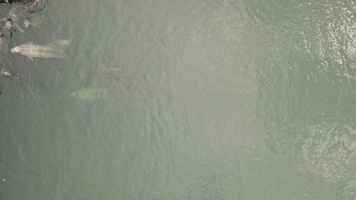
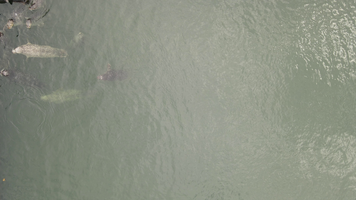
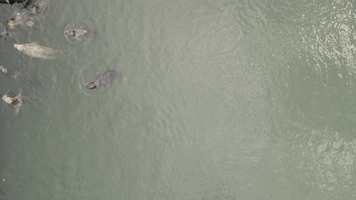
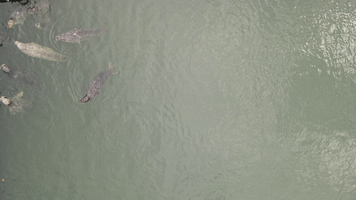

In [ ]:
num_selected_frames = 4
selected_frames = np.linspace(0, num_frames - 1, num_selected_frames, dtype=int)

mp.show_images(
    [frames[int(i)] for i in selected_frames],
    titles=[f"Frame {i}" for i in selected_frames],
    height=DISPLAY_HEIGHT,
)

Mask size: [2160, 3840]
Number of masks: 2


Frame,Mask

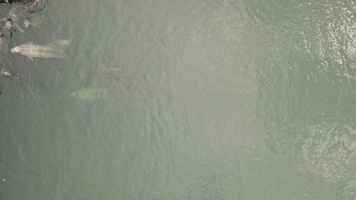
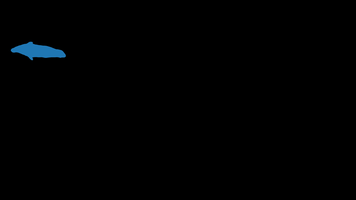

In [ ]:
def mask_to_rgb(mask: np.ndarray | Tensor, num_masks: int) -> np.ndarray:
    if isinstance(mask, Tensor):
        mask = mask.cpu().numpy()

    # Exclude background
    background = mask == 0
    mask = mask - 1
    num_masks = num_masks - 1

    # Choose palette
    if num_masks <= 10:
        mask_rgb = plt.get_cmap("tab10")(mask)[..., :3]
    elif num_masks <= 20:
        mask_rgb = plt.get_cmap("tab20")(mask)[..., :3]
    else:
        mask_rgb = plt.get_cmap("gist_rainbow")(mask / (num_masks - 1))[..., :3]

    mask_rgb = (mask_rgb * 255).astype(np.uint8)
    mask_rgb[background, :] = 0
    return mask_rgb

MASK_PATH = "/content/drive/MyDrive/seal_project/masks/DJI_0001_mask.png"

first_mask_np = np.array(Image.open(MASK_PATH).convert("L"))

first_mask_np = (first_mask_np > 0).astype(np.int64)

mask_height, mask_width = first_mask_np.shape  # [H', W']
print(f"Mask size: {[mask_height, mask_width]}")

num_masks = 2  # background + seal
print(f"Number of masks: {num_masks}")

mp.show_images(
    [frames[0], mask_to_rgb(first_mask_np, num_masks)],
    titles=["Frame", "Mask"],
    height=DISPLAY_HEIGHT,
)

In [ ]:
class ResizeToMultiple(nn.Module):
    def __init__(self, short_side: int, multiple: int):
        super().__init__()
        self.short_side = short_side
        self.multiple = multiple

    def _round_up(self, side: float) -> int:
        return math.ceil(side / self.multiple) * self.multiple

    def forward(self, img):
        old_width, old_height = TVTF.get_image_size(img)
        if old_width > old_height:
            new_height = self._round_up(self.short_side)
            new_width = self._round_up(old_width * new_height / old_height)
        else:
            new_width = self._round_up(self.short_side)
            new_height = self._round_up(old_height * new_width / old_width)
        return TVTF.resize(img, [new_height, new_width], interpolation=TVT.InterpolationMode.BICUBIC)


SHORT_SIDE = 960

transform = TVT.Compose(
    [
        ResizeToMultiple(short_side=SHORT_SIDE, multiple=patch_size),
        TVT.ToTensor(),
        TVT.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
first_frame = transform(frames[0]).to("cpu")
print(f"First frame: {first_frame}")

_, frame_height, frame_width = first_frame.shape  # Abbreviated as [H, W]
feats_height, feats_width = frame_height // patch_size, frame_width // patch_size  # Abbreviated as [h, w]

First frame: tensor[3, 960, 1712] n=4930560 (19Mb) x∈[-1.998, 2.082] μ=0.432 σ=0.316


In [ ]:
first_mask = torch.from_numpy(first_mask_np).to("cpu", dtype=torch.long)  # [H', W']
first_mask = F.interpolate(
    first_mask[None, None, :, :].float(),  # [1, 1, H', W']
    (feats_height, feats_width),
    mode="nearest-exact",
)[0, 0].long()  # [h, w]
print(f"First mask:  {first_mask}")

first_probs = F.one_hot(first_mask, num_masks).float()  # [h, w, M]
print(f"First probs: {first_probs}")

First mask:  tensor[60, 107] i64 n=6420 (50Kb) x∈[0, 1] μ=0.007 σ=0.086
First probs: tensor[60, 107, 2] n=12840 (50Kb) x∈[0., 1.000] μ=0.500 σ=0.500


In [ ]:
@torch.compile(disable=True)
def propagate(
    current_features: Tensor,      # [h", w", D]
    context_features: Tensor,      # [t, h, w, D]
    context_probs: Tensor,         # [t, h, w, M]
    neighborhood_mask: Tensor,     # [h", w", h, w]
    topk: int,
    temperature: float,
) -> Tensor:
    t, h, w, M = context_probs.shape

    # -------- COSINE SIMILARITY --------
    current_norm = F.normalize(current_features, dim=-1)   # [h", w", D]
    context_norm = F.normalize(context_features, dim=-1)   # [t, h, w, D]

    dot = torch.einsum(
        "ijd, tuvd -> ijtuv",
        current_norm,          # [h", w", D]
        context_norm,          # [t, h, w, D]
    )  # [h", w", t, h, w]  in [-1, 1]
    # -----------------------------------

    # Restrict focus to neighborhood (will be "all True" for pure cosine)
    dot = torch.where(
        neighborhood_mask[:, :, None, :, :],  # [h", w", 1, h, w]
        dot,
        -torch.inf,
    )

    # Top-k patches
    dot = dot.flatten(2, -1).flatten(0, 1)      # [h"w", thw]
    k_th_largest = torch.topk(dot, dim=1, k=topk).values  # [h"w", k]
    dot = torch.where(
        dot >= k_th_largest[:, -1:],
        dot,
        -torch.inf,
    )

    # Propagate probs
    weights = F.softmax(dot / temperature, dim=1)         # [h"w", thw]
    current_probs = torch.mm(
        weights,                            # [h"w", thw]
        context_probs.flatten(0, 2),        # [thw, M]
    )  # [h"w", M]

    current_probs = current_probs / current_probs.sum(dim=1, keepdim=True)
    return current_probs.unflatten(0, (h, w))  # [h", w", M]


In [ ]:
def forward(model, img):

    if img.ndim == 3:          # [3, H, W]
        img = img.unsqueeze(0)  # [1, 3, H, W]

    with torch.no_grad():
        outputs = model(pixel_values=img)

    last_hidden = outputs.last_hidden_state  # [1, N_tokens, D]

    num_reg = getattr(model.config, "num_register_tokens", 0)
    patch_tokens = last_hidden[:, 1 + num_reg :, :]
    _, _, H, W = img.shape   # input after transform
    patch_size = 16          # ViT-L/16

    H_p = H // patch_size
    W_p = W // patch_size

    # Now reshape correctly
    patch_grid = patch_tokens.reshape(1, H_p, W_p, -1)
    return patch_grid.squeeze(0)

In [ ]:
MAX_CONTEXT_LENGTH = 7
NEIGHBORHOOD_SIZE = 12
NEIGHBORHOOD_SHAPE = "circle"
TOPK = 5
TEMPERATURE = 0.2

In [ ]:
# =========================
# REQUIRED: Anchor init (run before Cell B)
# defines: first_feats, first_probs
# =========================

# 1) First frame -> features
first_frame = transform(frames[0]).to("cpu")      # [3,H,W]
first_feats = forward(model, first_frame)         # [h,w,D]
print("first_feats:", first_feats.shape)

# 2) First mask -> downsample to feature grid
first_mask = torch.from_numpy(first_mask_np).to("cpu", dtype=torch.long)  # [H',W']
first_mask_small = F.interpolate(
    first_mask[None, None].float(),
    size=(feats_height, feats_width),
    mode="nearest",
)[0, 0].long()  # [h,w]
print("first_mask_small:", first_mask_small.shape)

# 3) Convert to probs
first_probs = F.one_hot(first_mask_small, num_masks).float()  # [h,w,M]
print("first_probs:", first_probs.shape)


first_feats: torch.Size([60, 107, 1024])
first_mask_small: torch.Size([60, 107])
first_probs: torch.Size([60, 107, 2])


In [ ]:
import torch
import torch.nn.functional as F
import time, datetime
from tqdm import tqdm


# =========================
# ### NEW ### re-detect settings
# =========================
REDETECT_EVERY = 15   # run SAM every N frames
CONF_THRESH = 0.55    # if low confidence, force SAM re-detect

features_queue = []   # list[Tensor]
probs_queue = []      # list[Tensor]

mask_predictions = torch.zeros([num_frames, mask_height, mask_width], dtype=torch.uint8)
mask_predictions[0, :, :] = torch.from_numpy(first_mask_np).to(torch.uint8)

mask_probabilities = torch.zeros([num_frames, num_masks, mask_height, mask_width], dtype=torch.float32)
mask_probabilities[0] = F.one_hot(
    torch.from_numpy(first_mask_np).long(),
    num_masks
).movedim(-1, -3).float()

neighborhood_mask = torch.ones(
    (feats_height, feats_width, feats_height, feats_width),
    dtype=torch.bool,
    device="cpu",   # keep CPU-only
)

start = time.perf_counter()
for frame_idx in tqdm(range(1, num_frames), desc="Processing"):

    current_frame_pil = frames[frame_idx]

    # 1) Extract features
    current_frame = transform(current_frame_pil).to("cpu")
    current_feats = forward(model, current_frame)

    # 2) Context
    context_feats = torch.stack([first_feats, *features_queue], dim=0)
    context_probs = torch.stack([first_probs, *probs_queue], dim=0)

    # 3) DINO propagation
    current_probs = propagate(
        current_feats,
        context_feats,
        context_probs,
        neighborhood_mask,
        TOPK,
        TEMPERATURE,
    )  # [h,w,M]

    # 4) Upsample RAW probs to mask resolution (RAW is for argmax + confidence)
    current_probs_up_raw = F.interpolate(
        current_probs.movedim(-1, -3)[None, :, :, :],   # [1,M,h,w]
        size=(mask_height, mask_width),
        mode="bilinear",
        align_corners=False,
    )  # [1,M,H',W']

    # =========================
    # ### NEW ### confidence + re-detection
    # =========================
    maxprob = current_probs_up_raw.squeeze(0).max(dim=0).values
    mean_conf = float(maxprob.mean())

    do_redetect = (frame_idx % REDETECT_EVERY == 0) or (mean_conf < CONF_THRESH)

    if do_redetect:
        # SAM gives a fresh detection mask (binary) at mask resolution
        sam_mask_np = sam_redetect_binary_mask(current_frame_pil, mask_height, mask_width)

        # Convert SAM mask to feature-res probs [h,w,2] so it fits your pipeline
        sam_mask = torch.from_numpy(sam_mask_np).to("cpu").long()  # [H',W']
        sam_mask_small = F.interpolate(
            sam_mask[None, None].float(),
            size=(feats_height, feats_width),
            mode="nearest",
        )[0, 0].long()  # [h,w]

        current_probs = F.one_hot(sam_mask_small, num_masks).float()  # [h,w,2]

        # Recompute upsampled RAW from SAM probs
        current_probs_up_raw = F.interpolate(
            current_probs.movedim(-1, -3)[None, :, :, :],
            size=(mask_height, mask_width),
            mode="nearest",
        )

        # optional but recommended: reset memory to avoid drift
        features_queue.clear()
        probs_queue.clear()

    # 5) Save prediction from RAW (NO min-max here!)
    pred = current_probs_up_raw.squeeze(0).argmax(dim=0).to(dtype=torch.uint8)  # [H',W']
    mask_predictions[frame_idx, :, :] = pred

    # 6) Save probabilities ONLY for visualization
    current_probs_up_vis = postprocess_probs(current_probs_up_raw).squeeze(0)   # [M,H',W']
    mask_probabilities[frame_idx, :, :, :] = current_probs_up_vis

    # 7) Update queues (feature-space probs)
    features_queue.append(current_feats)
    probs_queue.append(current_probs)
    if len(features_queue) > MAX_CONTEXT_LENGTH:
        features_queue.pop(0)
    if len(probs_queue) > MAX_CONTEXT_LENGTH:
        probs_queue.pop(0)

end = time.perf_counter()
print(f"Processing time:    {datetime.timedelta(seconds=round(end - start))}")
print(f"Mask probabilities: {mask_probabilities.shape}")
print(f"Mask predictions:   {mask_predictions.shape}")


NameError: name 'num_frames' is not defined

In [ ]:
# How many pixels are predicted as seal (label==1) in each frame?
seal_pixels = [(i, int((mask_predictions[i] == 1).sum())) for i in range(num_frames)]
print(seal_pixels)

# Also check if we ever have more than 2 labels (should be {0,1})
print("Unique labels in some frames:", [torch.unique(mask_predictions[i]).tolist() for i in range(min(5, num_frames))])


[(0, 63777), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0)]
Unique labels in some frames: [[0, 1], [0], [0], [0], [0]]


In [ ]:

test_idx = 7  # a frame where you see many seals

sam_mask_np = sam_redetect_binary_mask_filtered(
    frames[test_idx],
    mask_height,
    mask_width
)

print("SAM mask pixels:", int(sam_mask_np.sum()))

mp.show_images(
    [
        frames[test_idx].convert("RGB"),
        sam_mask_np * 255
    ],
    titles=[f"Frame {test_idx}", "SAM merged mask"],
    height=DISPLAY_HEIGHT,
)



In [ ]:
current_probs = propagate(
    current_feats,                      # [60, 107, 1024]
    context_features=first_feats.unsqueeze(0),  # [1, 60, 107, 1024]
    context_probs=first_probs.unsqueeze(0),     # [1, 60, 107, 2]
    neighborhood_mask=neighborhood_mask,        # [60, 107, 60, 107]
    topk=5,
    temperature=0.2,
)

print("current_probs:", current_probs.shape)


In [ ]:
def postprocess_probs(
    probs: Tensor,  # [B, M, H', W']
) -> Tensor:
    vmin = probs.flatten(2, 3).min(dim=2).values  # [B, M]
    vmax = probs.flatten(2, 3).max(dim=2).values  # [B, M]
    probs = (probs - vmin[:, :, None, None]) / (vmax[:, :, None, None] - vmin[:, :, None, None])
    probs = torch.nan_to_num(probs, nan=0)
    return probs  # [B, M, H', W']


p = current_probs.movedim(-1, -3).unsqueeze(0)  # [1, M, h", w"]
p = F.interpolate(p, size=(mask_height, mask_width), mode="nearest")  # [1, M, H', W']
p = postprocess_probs(p).squeeze(0)  # [M, H', W']
current_pred_np = p.argmax(0).cpu().numpy()  # [H', W']
current_probs_np = p.cpu().numpy()  # [M, H', W']
del p

mp.show_images(
    [
        frames[0],
        current_frame_pil,
        mask_to_rgb(first_mask_np, num_masks),
        mask_to_rgb(current_pred_np, num_masks),
    ],
    titles=["First frame", "Second frame", "", ""],
    columns=2,
    height=DISPLAY_HEIGHT,
)

mp.show_images(current_probs_np, titles=[f"Mask {i}" for i in range(num_masks)], height=DISPLAY_HEIGHT)

In [ ]:
import mediapy as mp

mp.show_images(
    [frames[i].convert("RGB") for i in selected_frames]
    + [mask_to_rgb(mask_predictions[i], num_masks) for i in selected_frames],
    titles=[f"Frame {i}" for i in selected_frames] + [""] * len(selected_frames),
    columns=len(selected_frames),
    height=DISPLAY_HEIGHT,
)

# mp.show_videos(
#     {
#         "Input": [np.array(frame) for frame in frames],
#         "Pred": mask_to_rgb(mask_predictions, num_masks),
#     },
#     height=DISPLAY_HEIGHT,
#     fps=24,
# )
# mp.show_videos(
#     {f"Prob {i}": mask_probabilities[:, i].numpy() for i in range(num_masks)},
#     height=DISPLAY_HEIGHT,
#     fps=24,
# )

# ===== Cell 4 (fixed): Show videos correctly even if frame sizes differ =====

# 1) choose a fixed size (use the first frame as reference)
W, H = frames[0].size

# 2) make input video with consistent shape
input_video = np.stack(
    [np.array(f.convert("RGB").resize((W, H))) for f in frames],
    axis=0
)  # [T,H,W,3]

# 3) make pred video match the same size too
# If your masks are already same size, just visualize them (they are [mask_height, mask_width])
pred_video = mask_to_rgb(mask_predictions.numpy(), num_masks)  # [T,mask_h,mask_w,3]

# If mask size != frame size, resize pred_video to (H,W) for display
if pred_video.shape[1] != H or pred_video.shape[2] != W:
    pred_video = np.stack(
        [cv2.resize(pred_video[i], (W, H), interpolation=cv2.INTER_NEAREST) for i in range(pred_video.shape[0])],
        axis=0
    )

mp.show_videos(
    {"Input": input_video, "Pred": pred_video},
    height=DISPLAY_HEIGHT,
    fps=24,
)

# 4) probabilities (also resize to frame size)
prob0 = (mask_probabilities[:, 0].numpy() * 255).astype(np.uint8)
prob1 = (mask_probabilities[:, 1].numpy() * 255).astype(np.uint8)

if prob0.shape[1] != H or prob0.shape[2] != W:
    prob0 = np.stack([cv2.resize(prob0[i], (W, H), interpolation=cv2.INTER_NEAREST) for i in range(prob0.shape[0])], axis=0)
    prob1 = np.stack([cv2.resize(prob1[i], (W, H), interpolation=cv2.INTER_NEAREST) for i in range(prob1.shape[0])], axis=0)

mp.show_videos(
    {"Prob 0": prob0, "Prob 1": prob1},
    height=DISPLAY_HEIGHT,
    fps=24,
)



In [ ]:
print(f"Peak GPU memory: {torch.cuda.max_memory_allocated() / 2**30:.1f} GB")

In [5]:
# ============================================================
# CELL 2 — Imports + Global Setup
# ============================================================
import os, math, time, datetime, logging, urllib.request
from pathlib import Path

import numpy as np
import cv2
import mediapy as mp
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn.functional as F
import torchvision.transforms as TVT
import torchvision.transforms.functional as TVTF
from torch import Tensor, nn
from tqdm import tqdm

import lovely_tensors
lovely_tensors.monkey_patch()
torch.set_grad_enabled(False)

DISPLAY_HEIGHT = 200
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

print("Python:", os.popen("which python").read().strip())
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

# Device strategy:
# - DINO on CUDA if available
# - Propagation on CPU (avoid OOM)
DINO_DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
PROP_DEVICE = "cpu"

# SAM can be heavy on GPU too; keep it on CPU for stability (you can change to "cuda" if you want)
SAM_DEVICE = "cpu"

print("DINO_DEVICE:", DINO_DEVICE)
print("PROP_DEVICE:", PROP_DEVICE)
print("SAM_DEVICE:", SAM_DEVICE)


Python: /usr/local/bin/python
Torch: 2.9.0+cpu
CUDA available: False
CUDA version: None
DINO_DEVICE: cpu
PROP_DEVICE: cpu
SAM_DEVICE: cpu


In [6]:
# ============================================================
# CELL 3 — SAM ViT-B + filtered re-detect
# ============================================================
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

sam_checkpoint = "/content/sam_vit_b_01ec64.pth"
sam_url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"

if not os.path.exists(sam_checkpoint):
    print("Downloading SAM ViT-B checkpoint...")
    urllib.request.urlretrieve(sam_url, sam_checkpoint)
    print("Downloaded:", sam_checkpoint)
else:
    print("SAM checkpoint exists:", sam_checkpoint)

sam = sam_model_registry["vit_b"](checkpoint=sam_checkpoint)
sam.to(SAM_DEVICE).eval()
print("SAM loaded ✅ on", SAM_DEVICE)

sam_mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.6,
    stability_score_thresh=0.6,
    min_mask_region_area=50,
)

SAM_MIN_AREA = 200
SAM_MAX_AREA = 20000

def sam_redetect_binary_mask_filtered(frame_pil, out_h, out_w, min_area=SAM_MIN_AREA, max_area=SAM_MAX_AREA):
    img_np = np.array(frame_pil.convert("RGB"))
    anns = sam_mask_generator.generate(img_np)

    H, W = img_np.shape[:2]
    merged = np.zeros((H, W), dtype=np.uint8)

    kept = 0
    for a in anns:
        seg = a["segmentation"].astype(np.uint8)
        area = int(seg.sum())
        if min_area <= area <= max_area:
            merged = np.maximum(merged, seg)
            kept += 1

    merged = cv2.resize(merged, (out_w, out_h), interpolation=cv2.INTER_NEAREST)
    print(f"SAM total masks: {len(anns)} | kept: {kept} | merged pixels: {int(merged.sum())}")
    return merged

# Keep an alias name so your loop can call it safely
def sam_redetect_binary_mask(frame_pil, out_h, out_w):
    return sam_redetect_binary_mask_filtered(frame_pil, out_h, out_w)


Downloaded: /content/sam_vit_b_01ec64.pth
SAM loaded ✅ on cpu


In [7]:
# ============================================================
# CELL 4 — Load DINOv3 (HuggingFace)
# ============================================================
from transformers import AutoImageProcessor, AutoModel

processor = AutoImageProcessor.from_pretrained("facebook/dinov3-vitl16-pretrain-lvd1689m")
model = AutoModel.from_pretrained("facebook/dinov3-vitl16-pretrain-lvd1689m")

model.to(DINO_DEVICE).eval()
print("DINO loaded ✅ on:", next(model.parameters()).device)

patch_size = 16
embed_dim = model.config.hidden_size
print("patch_size:", patch_size, "| embed_dim:", embed_dim)

if torch.cuda.is_available():
    torch.cuda.reset_peak_memory_stats()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/745 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

DINO loaded ✅ on: cpu
patch_size: 16 | embed_dim: 1024


Using frames from: /content/drive/MyDrive/seal_project/frames/DJI_0001
total 16804
-rw------- 1 root root  196233 Nov 17 20:43 frame_00000_cropped.jpg
-rw------- 1 root root 1505962 Nov 17 20:22 frame_00000.jpg
-rw------- 1 root root 1435065 Nov 17 20:22 frame_00010.jpg
-rw------- 1 root root 1436066 Nov 17 20:22 frame_00020.jpg
-rw------- 1 root root 1821116 Nov 17 20:22 frame_00030.jpg
-rw------- 1 root root 1418395 Nov 17 20:22 frame_00040.jpg
-rw------- 1 root root 1428533 Nov 17 20:22 frame_00050.jpg
-rw------- 1 root root 1842681 Nov 17 20:22 frame_00060.jpg
-rw------- 1 root root 1430555 Nov 17 20:22 frame_00070.jpg
Number of frames: 12
Original size: width=3840, height=2160


Frame 0,Frame 3,Frame 7,Frame 11

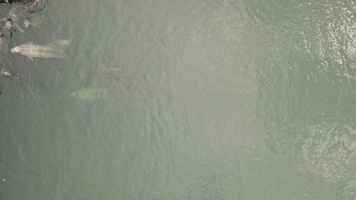
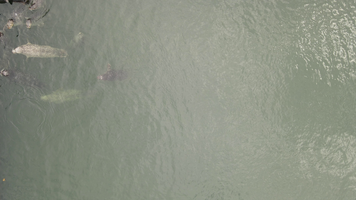
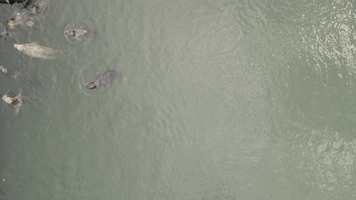
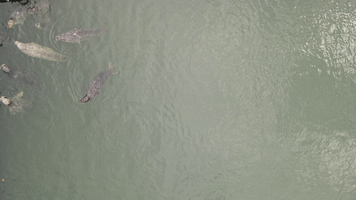

In [8]:
# ============================================================
# CELL 5 — Load frames from Drive
# ============================================================
VIDEO_NAME = "DJI_0001"
FRAMES_DIR = f"/content/drive/MyDrive/seal_project/frames/{VIDEO_NAME}"
print("Using frames from:", FRAMES_DIR)

!ls -l $FRAMES_DIR | head

frames = [Image.open(os.path.join(FRAMES_DIR, f)).convert("RGB")
          for f in sorted(os.listdir(FRAMES_DIR))
          if f.lower().endswith((".jpg", ".png"))]

num_frames = len(frames)
print("Number of frames:", num_frames)

original_width, original_height = frames[0].size
print(f"Original size: width={original_width}, height={original_height}")

num_selected_frames = 4
selected_frames = np.linspace(0, num_frames - 1, num_selected_frames, dtype=int)

mp.show_images(
    [frames[int(i)] for i in selected_frames],
    titles=[f"Frame {i}" for i in selected_frames],
    height=DISPLAY_HEIGHT,
)


In [9]:
# ============================================================
# CELL 6 — Utilities: mask_to_rgb + ResizeToMultiple + postprocess_probs
# ============================================================
def mask_to_rgb(mask: np.ndarray | Tensor, num_masks: int) -> np.ndarray:
    if isinstance(mask, Tensor):
        mask = mask.cpu().numpy()

    background = mask == 0
    mask = mask - 1
    num_masks = num_masks - 1

    if num_masks <= 10:
        mask_rgb = plt.get_cmap("tab10")(mask)[..., :3]
    elif num_masks <= 20:
        mask_rgb = plt.get_cmap("tab20")(mask)[..., :3]
    else:
        mask_rgb = plt.get_cmap("gist_rainbow")(mask / (num_masks - 1))[..., :3]

    mask_rgb = (mask_rgb * 255).astype(np.uint8)
    mask_rgb[background, :] = 0
    return mask_rgb

class ResizeToMultiple(nn.Module):
    def __init__(self, short_side: int, multiple: int):
        super().__init__()
        self.short_side = short_side
        self.multiple = multiple

    def _round_up(self, side: float) -> int:
        return math.ceil(side / self.multiple) * self.multiple

    def forward(self, img):
        old_width, old_height = TVTF.get_image_size(img)
        if old_width > old_height:
            new_height = self._round_up(self.short_side)
            new_width = self._round_up(old_width * new_height / old_height)
        else:
            new_width = self._round_up(self.short_side)
            new_height = self._round_up(old_height * new_width / old_width)
        return TVTF.resize(img, [new_height, new_width], interpolation=TVT.InterpolationMode.BICUBIC)

def postprocess_probs(probs: Tensor) -> Tensor:
    # probs: [B, M, H, W]
    vmin = probs.flatten(2, 3).min(dim=2).values
    vmax = probs.flatten(2, 3).max(dim=2).values
    probs = (probs - vmin[:, :, None, None]) / (vmax[:, :, None, None] - vmin[:, :, None, None] + 1e-8)
    return torch.nan_to_num(probs, nan=0.0)


Mask size: (2160, 3840)
num_masks: 2
Transformed frame size: (960, 1712)
Feature grid size: (60, 107)


Frame 0,Mask 0

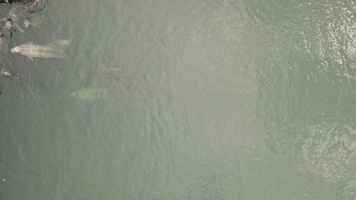
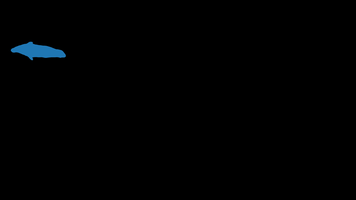

In [10]:
# ============================================================
# CELL 7 — Load first mask + build transform + compute grid sizes
# ============================================================
MASK_PATH = "/content/drive/MyDrive/seal_project/masks/DJI_0001_mask.png"
first_mask_np = np.array(Image.open(MASK_PATH).convert("L"))
first_mask_np = (first_mask_np > 0).astype(np.int64)

mask_height, mask_width = first_mask_np.shape
num_masks = 2  # background + seal

print("Mask size:", (mask_height, mask_width))
print("num_masks:", num_masks)

SHORT_SIDE = 960
transform = TVT.Compose([
    ResizeToMultiple(short_side=SHORT_SIDE, multiple=patch_size),
    TVT.ToTensor(),
    TVT.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Use transform on CPU just to get sizes
tmp = transform(frames[0])  # [3,H,W] on CPU
_, frame_height, frame_width = tmp.shape
feats_height, feats_width = frame_height // patch_size, frame_width // patch_size
del tmp

print("Transformed frame size:", (frame_height, frame_width))
print("Feature grid size:", (feats_height, feats_width))

mp.show_images(
    [frames[0], mask_to_rgb(first_mask_np, num_masks)],
    titles=["Frame 0", "Mask 0"],
    height=DISPLAY_HEIGHT,
)


In [11]:
# ============================================================
# CELL 8 — DINO forward + feature extraction helper (GPU -> CPU)
# ============================================================
def dino_forward_patchgrid(model, img_tensor_3chw: Tensor) -> Tensor:
    # img_tensor_3chw: [3,H,W] OR [1,3,H,W] on DINO_DEVICE
    if img_tensor_3chw.ndim == 3:
        img_tensor_3chw = img_tensor_3chw.unsqueeze(0)

    with torch.no_grad():
        outputs = model(pixel_values=img_tensor_3chw)

    last_hidden = outputs.last_hidden_state  # [1, N_tokens, D]
    num_reg = getattr(model.config, "num_register_tokens", 0)
    patch_tokens = last_hidden[:, 1 + num_reg :, :]  # remove CLS + register tokens

    _, _, H, W = img_tensor_3chw.shape
    H_p = H // patch_size
    W_p = W // patch_size

    patch_grid = patch_tokens.reshape(1, H_p, W_p, -1)  # [1,h,w,D]
    return patch_grid.squeeze(0)  # [h,w,D]

def extract_feats_cpu(frame_pil: Image.Image) -> Tensor:
    # Transform on CPU -> move to DINO_DEVICE -> forward -> return CPU tensor
    img = transform(frame_pil)                 # CPU
    img = img.to(DINO_DEVICE, non_blocking=True)
    feats = dino_forward_patchgrid(model, img) # on DINO_DEVICE
    return feats.to(PROP_DEVICE)               # CPU for propagation


In [12]:
# ============================================================
# CELL 9 — Propagation (CPU) + init anchor
# ============================================================
@torch.compile(disable=True)
def propagate(
    current_features: Tensor,      # [h", w", D] on CPU
    context_features: Tensor,      # [t, h, w, D] on CPU
    context_probs: Tensor,         # [t, h, w, M] on CPU
    neighborhood_mask: Tensor,     # [h", w", h, w] on CPU
    topk: int,
    temperature: float,
) -> Tensor:
    t, h, w, M = context_probs.shape

    current_norm = F.normalize(current_features, dim=-1)
    context_norm = F.normalize(context_features, dim=-1)

    dot = torch.einsum("ijd, tuvd -> ijtuv", current_norm, context_norm)  # [h",w",t,h,w]

    dot = torch.where(
        neighborhood_mask[:, :, None, :, :],
        dot,
        -torch.inf,
    )

    dot = dot.flatten(2, -1).flatten(0, 1)  # [h"w", thw]
    k_th_largest = torch.topk(dot, dim=1, k=topk).values
    dot = torch.where(dot >= k_th_largest[:, -1:], dot, -torch.inf)

    weights = F.softmax(dot / temperature, dim=1)  # [h"w", thw]
    current_probs = torch.mm(weights, context_probs.flatten(0, 2))  # [h"w", M]
    current_probs = current_probs / (current_probs.sum(dim=1, keepdim=True) + 1e-8)
    return current_probs.unflatten(0, (h, w))  # [h",w",M]

# --- Anchor init ---
first_feats = extract_feats_cpu(frames[0])  # CPU
print("first_feats:", first_feats.shape)

first_mask = torch.from_numpy(first_mask_np).to(PROP_DEVICE, dtype=torch.long)  # [H',W']
first_mask_small = F.interpolate(
    first_mask[None, None].float(),
    size=(feats_height, feats_width),
    mode="nearest",
)[0, 0].long()  # [h,w]
first_probs = F.one_hot(first_mask_small, num_masks).float()  # [h,w,M]

print("first_mask_small:", first_mask_small.shape)
print("first_probs:", first_probs.shape)

# neighborhood mask (CPU). For now it's "all True"
neighborhood_mask = torch.ones(
    (feats_height, feats_width, feats_height, feats_width),
    dtype=torch.bool,
    device=PROP_DEVICE,
)
print("neighborhood_mask:", neighborhood_mask.shape)


first_feats: torch.Size([60, 107, 1024])
first_mask_small: torch.Size([60, 107])
first_probs: torch.Size([60, 107, 2])
neighborhood_mask: torch.Size([60, 107, 60, 107])


In [13]:
# ============================================================
# CELL 10 — Main tracking loop (DINO on GPU, propagate on CPU, SAM on CPU)
# ============================================================
MAX_CONTEXT_LENGTH = 7
TOPK = 5
TEMPERATURE = 0.2

REDETECT_EVERY = 15
CONF_THRESH = 0.55

features_queue = []
probs_queue = []

mask_predictions = torch.zeros([num_frames, mask_height, mask_width], dtype=torch.uint8)
mask_predictions[0] = torch.from_numpy(first_mask_np).to(torch.uint8)

mask_probabilities = torch.zeros([num_frames, num_masks, mask_height, mask_width], dtype=torch.float32)
mask_probabilities[0] = F.one_hot(
    torch.from_numpy(first_mask_np).long(),
    num_masks
).movedim(-1, -3).float()

start = time.perf_counter()

for frame_idx in tqdm(range(1, num_frames), desc="Processing"):
    current_frame_pil = frames[frame_idx]

    # 1) DINO feats (GPU -> CPU)
    current_feats = extract_feats_cpu(current_frame_pil)

    # 2) Context
    context_feats = torch.stack([first_feats, *features_queue], dim=0)
    context_probs = torch.stack([first_probs, *probs_queue], dim=0)

    # 3) Propagate on CPU
    current_probs = propagate(
        current_feats,
        context_feats,
        context_probs,
        neighborhood_mask,
        TOPK,
        TEMPERATURE,
    )  # [h,w,M]

    # 4) Upsample raw probs to mask resolution
    current_probs_up_raw = F.interpolate(
        current_probs.movedim(-1, -3)[None, :, :, :],   # [1,M,h,w]
        size=(mask_height, mask_width),
        mode="bilinear",
        align_corners=False,
    )  # [1,M,H',W']

    # 5) Confidence + re-detect
    maxprob = current_probs_up_raw.squeeze(0).max(dim=0).values
    mean_conf = float(maxprob.mean())

    do_redetect = (frame_idx % REDETECT_EVERY == 0) or (mean_conf < CONF_THRESH)
    if do_redetect:
        sam_mask_np = sam_redetect_binary_mask(current_frame_pil, mask_height, mask_width)

        sam_mask = torch.from_numpy(sam_mask_np).to(PROP_DEVICE).long()  # [H',W']
        sam_mask_small = F.interpolate(
            sam_mask[None, None].float(),
            size=(feats_height, feats_width),
            mode="nearest",
        )[0, 0].long()  # [h,w]

        current_probs = F.one_hot(sam_mask_small, num_masks).float()  # [h,w,M]

        current_probs_up_raw = F.interpolate(
            current_probs.movedim(-1, -3)[None, :, :, :],
            size=(mask_height, mask_width),
            mode="nearest",
        )

        # reset memory to avoid drift
        features_queue.clear()
        probs_queue.clear()

    # 6) Prediction from RAW (no min-max!)
    pred = current_probs_up_raw.squeeze(0).argmax(dim=0).to(dtype=torch.uint8)
    mask_predictions[frame_idx] = pred

    # 7) Probabilities only for visualization (min-max)
    current_probs_up_vis = postprocess_probs(current_probs_up_raw).squeeze(0)  # [M,H',W']
    mask_probabilities[frame_idx] = current_probs_up_vis

    # 8) Update memory (feature-space)
    features_queue.append(current_feats)
    probs_queue.append(current_probs)
    if len(features_queue) > MAX_CONTEXT_LENGTH:
        features_queue.pop(0)
    if len(probs_queue) > MAX_CONTEXT_LENGTH:
        probs_queue.pop(0)

end = time.perf_counter()
print(f"Processing time: {datetime.timedelta(seconds=round(end - start))}")
print("mask_probabilities:", mask_probabilities.shape)
print("mask_predictions:", mask_predictions.shape)


Processing: 100%|██████████| 11/11 [36:48<00:00, 200.77s/it]

Processing time: 0:36:49
mask_probabilities: torch.Size([12, 2, 2160, 3840])
mask_predictions: torch.Size([12, 2160, 3840])


seal_pixels (first 20): [(0, 63777), (1, 0), (2, 67723), (3, 66443), (4, 63784), (5, 64051), (6, 61148), (7, 62355), (8, 61877), (9, 60537), (10, 59752), (11, 60956)]
Unique labels (first 5 frames): [[0, 1], [0], [0, 1], [0, 1], [0, 1]]


Frame 0,Frame 3,Frame 7,Frame 11
,,,

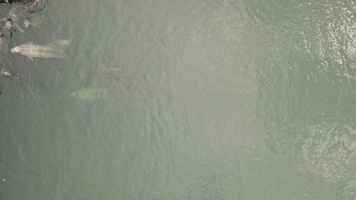
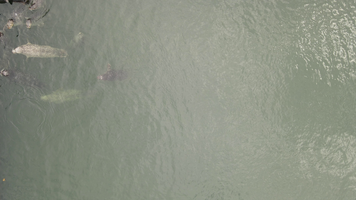
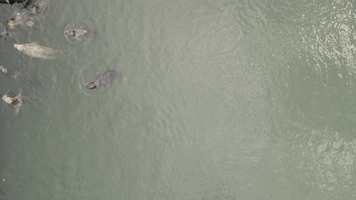
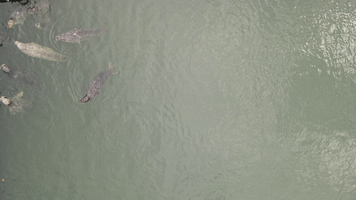
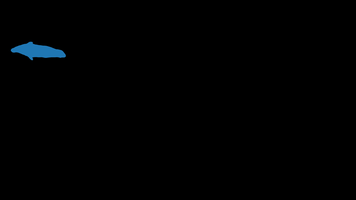
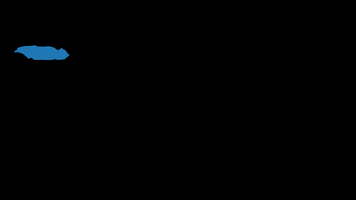
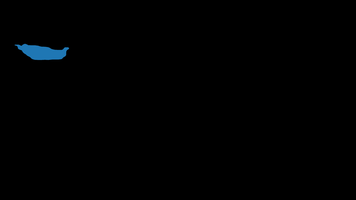
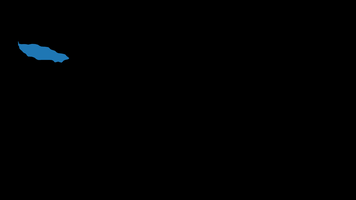

No CUDA available.


In [14]:
# ============================================================
# CELL 11 — Quick sanity checks + videos
# ============================================================
seal_pixels = [(i, int((mask_predictions[i] == 1).sum())) for i in range(num_frames)]
print("seal_pixels (first 20):", seal_pixels[:20])

print("Unique labels (first 5 frames):",
      [torch.unique(mask_predictions[i]).tolist() for i in range(min(5, num_frames))])

# Show images
mp.show_images(
    [frames[i].convert("RGB") for i in selected_frames]
    + [mask_to_rgb(mask_predictions[i], num_masks) for i in selected_frames],
    titles=[f"Frame {i}" for i in selected_frames] + [""] * len(selected_frames),
    columns=len(selected_frames),
    height=DISPLAY_HEIGHT,
)

# Videos (resize predictions to frame size)
W, H = frames[0].size
input_video = np.stack([np.array(f.convert("RGB").resize((W, H))) for f in frames], axis=0)

pred_video = mask_to_rgb(mask_predictions.numpy(), num_masks)  # [T,mask_h,mask_w,3]
if pred_video.shape[1] != H or pred_video.shape[2] != W:
    pred_video = np.stack(
        [cv2.resize(pred_video[i], (W, H), interpolation=cv2.INTER_NEAREST) for i in range(pred_video.shape[0])],
        axis=0
    )

mp.show_videos({"Input": input_video, "Pred": pred_video}, height=DISPLAY_HEIGHT, fps=24)

# Prob videos
prob0 = (mask_probabilities[:, 0].numpy() * 255).astype(np.uint8)
prob1 = (mask_probabilities[:, 1].numpy() * 255).astype(np.uint8)

if prob0.shape[1] != H or prob0.shape[2] != W:
    prob0 = np.stack([cv2.resize(prob0[i], (W, H), interpolation=cv2.INTER_NEAREST) for i in range(prob0.shape[0])], axis=0)
    prob1 = np.stack([cv2.resize(prob1[i], (W, H), interpolation=cv2.INTER_NEAREST) for i in range(prob1.shape[0])], axis=0)

mp.show_videos({"Prob 0": prob0, "Prob 1": prob1}, height=DISPLAY_HEIGHT, fps=24)

# GPU memory
if torch.cuda.is_available():
    print(f"Peak GPU memory: {torch.cuda.max_memory_allocated() / 2**30:.2f} GB")
else:
    print("No CUDA available.")


In [15]:
RESULTS_DIR = "/content/drive/MyDrive/seal_project/results"
os.makedirs(RESULTS_DIR, exist_ok=True)

# save masks
np.save(f"{RESULTS_DIR}/mask_predictions.npy", mask_predictions.numpy())
np.save(f"{RESULTS_DIR}/mask_probabilities.npy", mask_probabilities.numpy())

print("Saved to:", RESULTS_DIR)


Saved to: /content/drive/MyDrive/seal_project/results


In [16]:
mp.write_video(
    f"{RESULTS_DIR}/pred.mp4",
    pred_video,
    fps=24
)